In [138]:
# step 1: importing pandas,sesborn,matplot libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
# Step 2: reading the file data
df = pd.read_csv("/content/ATM Cash Demand Forecast for BankServe.csv")

In [140]:
# Step 3: Inspecting the file data
print(df.info())
print("\n" + "-"*70 + "\n")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   atm_id                  1000 non-null   int64  
 1   date                    1000 non-null   object 
 2   location_type           1000 non-null   object 
 3   nearby_population       1000 non-null   int64  
 4   income_level            1000 non-null   object 
 5   holiday_flag            1000 non-null   int64  
 6   local_event_flag        1000 non-null   int64  
 7   season                  1000 non-null   object 
 8   forecasted_cash_demand  1000 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB
None

----------------------------------------------------------------------

   atm_id        date location_type  nearby_population income_level  \
0    1096  2023-01-01         Rural              13123         High   
1    1050  2023-01-02        

In [141]:
# Step 4: date is object(string) thus we need to change it to pandas datetime format
df['date'] = pd.to_datetime(df['date'])
df_clean = df.copy()
df.head()

,atm_id,date,location_type,nearby_population,income_level,holiday_flag,local_event_flag,season,forecasted_cash_demand
0,1096,2023-01-01,Rural,13123,High,0,1,Winter,10000.0
1,1050,2023-01-02,Urban,129657,Medium,0,0,Winter,10000.0
2,1060,2023-01-03,Suburban,69842,Medium,1,0,Summer,10000.0
3,1015,2023-01-04,Suburban,36342,Medium,0,0,Winter,10000.0
4,1047,2023-01-05,Urban,68152,Low,1,0,Monsoon,10000.0


In [142]:
# Step 5.1: defining Features and Target
features = ['location_type','nearby_population','income_level','holiday_flag','local_event_flag','season']
target = 'forecasted_cash_demand'

In [143]:
# Step 5.2: defining x and y
x = df[features]
y = df[target]

In [144]:
# Step 6: Encode categorical variables
x = pd.get_dummies(x, drop_first=True)
print(x.head())

   nearby_population  holiday_flag  local_event_flag  location_type_Suburban  \
0              13123             0                 1                   False   
1             129657             0                 0                   False   
2              69842             1                 0                    True   
3              36342             0                 0                    True   
4              68152             1                 0                   False   

   location_type_Urban  income_level_Low  income_level_Medium  season_Summer  \
0                False             False                False          False   
1                 True             False                 True          False   
2                False             False                 True           True   
3                False             False                 True          False   
4                 True              True                False          False   

   season_Winter  
0           True  


In [ ]:
# Step 7: Spliting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.8,random_state = 2529)

In [146]:
# Step 8: Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# Since we have 1000 enteries meaning small dataset thus using 200 trees
model = RandomForestRegressor(n_estimators=200,max_depth=10,random_state=2529,n_jobs=-1)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, n_jobs=-1,
                      random_state=2529)

In [147]:
# Step 9: Make predictions on test set
y_pred = model.predict(x_test)

In [148]:
# Step 9: Evaluating performance
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.4f}")

MAPE: 0.0038


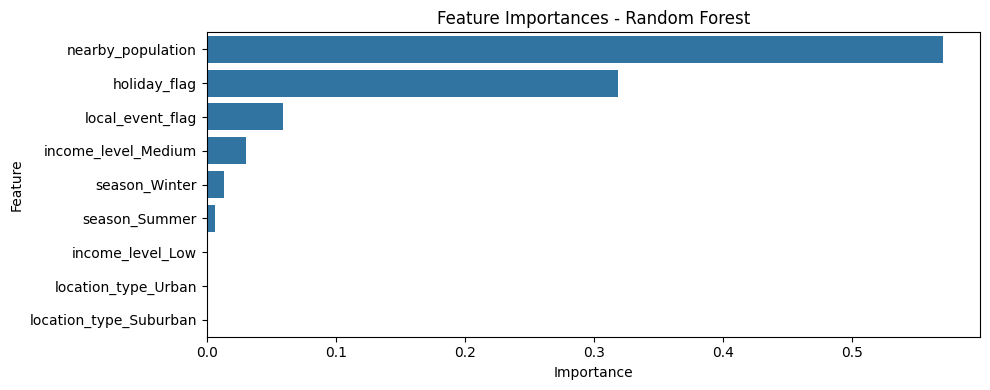

In [149]:
# Step 10: Plot feature importance
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

In [150]:
# Step 11: Saving the trained model using pickle

import pickle
pickle_out = open("atm_demand_model.pkl", mode = "wb")
pickle.dump(model, pickle_out)
pickle_out.close()